In [3]:

shellLocation="dealdata.txt"

edudf = pd.read_csv(eduLocation,sep="\t", header=None,names = ["fsize","ftagnum","flinecount","ftagtype","fflag"])
shelldf=pd.read_csv(shellLocation,sep="\t", header=None,names = ["fsize","ftagnum","flinecount","ftagtype","fflag"])

In [4]:
edudf.head()

,fsize,ftagnum,flinecount,ftagtype,fflag
0,18853,234,332,22,0
1,43972,441,912,21,0
2,37773,454,641,26,0
3,6247,78,145,16,0
4,30678,487,499,27,0


In [40]:
eduX = edudf[["fsize","ftagnum","flinecount","ftagtype",]]
eduX.tail()

,fsize,ftagnum,flinecount,ftagtype
985,38641,499,778,32
986,83248,1326,1174,28
987,30644,520,705,18
988,34000,356,372,36
989,56146,552,1019,29


In [39]:
shellX = shelldf[["fsize","ftagnum","flinecount","ftagtype",]]
shellX.tail()

,fsize,ftagnum,flinecount,ftagtype
136,1332,26,43,16
137,203,0,2,0
138,285216,5487,109,24
139,7654,37,55,14
140,1202,21,5,16


In [7]:
eduy = edudf[['fflag']]
shelly = shelldf[['fflag']]

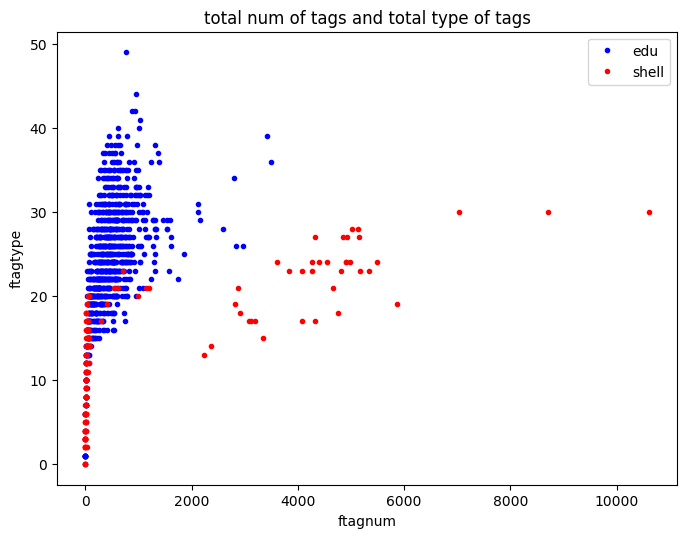

In [8]:
import pylab as pl

pl.figure(figsize=(8,6),dpi=100)
pl.plot(edudf['ftagnum'],edudf['ftagtype'],'.',color='blue', label='edu')
pl.plot(shelldf['ftagnum'],shelldf['ftagtype'],'.',color='red', label='shell')
pl.xlabel('ftagnum')
pl.ylabel('ftagtype')

pl.legend()
pl.title('total num of tags and total type of tags')
pl.show()

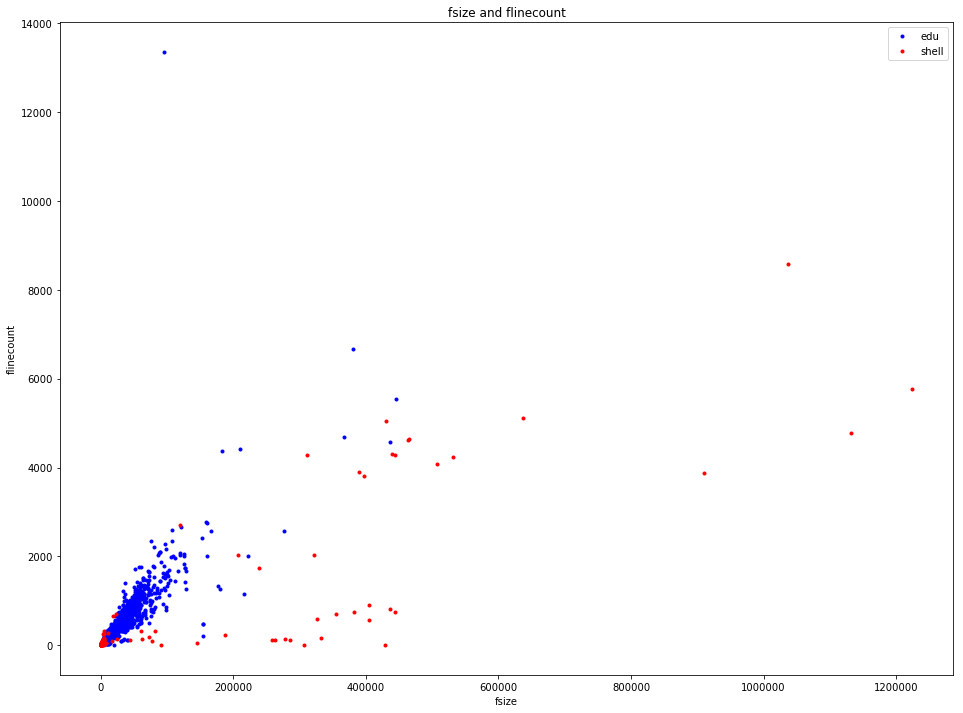

In [9]:
pl.figure(figsize=(16,12))

pl.plot(edudf['fsize'],edudf['flinecount'],'.',color='blue', label='edu')
pl.plot(shelldf['fsize'],shelldf['flinecount'],'.',color='red', label='shell')
pl.xlabel('fsize')
pl.ylabel('flinecount')

pl.legend()
pl.title('fsize and flinecount')
pl.show()

In [38]:
# 数据集合划分
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
totalLocation="totaldata.txt"
totoaldf = pd.read_csv(totalLocation,sep="\t", header=None,names = ["fsize","ftagnum","flinecount","ftagtype","fflag"])
totalX = totoaldf[["fsize","ftagnum","flinecount","ftagtype",]]
totaly = totoaldf[['fflag']]
for randomNum in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(totalX, totaly, test_size=0.33, random_state=randomNum)
    clf = GaussianNB()
    #拟合数据
    clf.fit(X_train, y_train)
    y_pred_class = clf.predict(X_test)
    # calculate accuracy
    print '数据集',randomNum,"::",
    print '准确率：',metrics.accuracy_score(y_test, y_pred_class),"\t",
    print '精确率：',metrics.precision_score(y_test,y_pred_class),"\t",
    print '召回率：',metrics.recall_score(y_test,y_pred_class),"\t",
    print '错误率：',1-(metrics.accuracy_score(y_test, y_pred_class))

数据集 0 :: 准确率： 0.895721925134 	精确率： 0.444444444444 	召回率： 0.216216216216 	错误率： 0.104278074866
数据集 1 :: 准确率： 0.855614973262 	精确率： 0.391304347826 	召回率： 0.183673469388 	错误率： 0.144385026738
数据集 2 :: 准确率： 0.917112299465 	精确率： 0.55 	召回率： 0.333333333333 	错误率： 0.0828877005348
数据集 3 :: 准确率： 0.877005347594 	精确率： 0.608695652174 	召回率： 0.274509803922 	错误率： 0.122994652406
数据集 4 :: 准确率： 0.890374331551 	精确率： 0.625 	召回率： 0.222222222222 	错误率： 0.109625668449
数据集 5 :: 准确率： 0.909090909091 	精确率： 0.625 	召回率： 0.263157894737 	错误率： 0.0909090909091
数据集 6 :: 准确率： 0.893048128342 	精确率： 0.636363636364 	召回率： 0.162790697674 	错误率： 0.106951871658
数据集 7 :: 准确率： 0.893048128342 	精确率： 0.727272727273 	召回率： 0.32 	错误率： 0.106951871658
数据集 8 :: 准确率： 0.852941176471 	精确率： 0.5 	召回率： 0.218181818182 	错误率： 0.147058823529
数据集 9 :: 准确率： 0.890374331551 	精确率： 0.733333333333 	召回率： 0.229166666667 	错误率： 0.109625668449


/home/yaoleo/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [12]:
clf.score(X_test, y_test) 


0.89037433155080214

In [13]:
y_pred_class = clf.predict(X_test)

In [35]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)
print '准确率：',metrics.accuracy_score(y_test, y_pred_class)
print '精确率：',metrics.precision_score(y_test,y_pred_class)
print '召回率：',metrics.recall_score(y_test,y_pred_class)
print '错误率：',1-(metrics.accuracy_score(y_test, y_pred_class))

0.890374331551
准确率： 0.890374331551
精确率： 0.777777777778
召回率： 0.274509803922
错误率： 0.109625668449


In [15]:
# 训练感知机模型
from sklearn.linear_model import Perceptron
# n_iter：可以理解成梯度下降中迭代的次数
# eta0：可以理解成梯度下降中的学习率
# random_state：设置随机种子的，为了每次迭代都有相同的训练集顺序
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [22]:
ppn.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'eta0': 0.1,
 'fit_intercept': True,
 'n_iter': 40,
 'n_jobs': 1,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'verbose': 0,
 'warm_start': False}

In [23]:
# 分类测试集，这将返回一个测试结果的数组
y_pred = ppn.predict(X_test)
# 计算模型在测试集上的准确性，我的结果为0.9，还不错
metrics.accuracy_score(y_test, y_pred)

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0]


In [24]:
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = svr.predict(X_test)
svr.score(X_test, y_test, sample_weight=None)

0.0062093454293148387